<a href="https://colab.research.google.com/github/allanbraquiel/Notebooks/blob/master/Dados_sobre_suicidio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.available

['dark_background',
 'seaborn-poster',
 'seaborn',
 'grayscale',
 'seaborn-notebook',
 'classic',
 'seaborn-paper',
 'Solarize_Light2',
 'seaborn-whitegrid',
 'seaborn-deep',
 'seaborn-ticks',
 'ggplot',
 '_classic_test',
 'bmh',
 'seaborn-dark-palette',
 'seaborn-white',
 'fast',
 'seaborn-muted',
 'seaborn-talk',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-pastel',
 'seaborn-darkgrid',
 'fivethirtyeight',
 'tableau-colorblind10']

In [0]:
plt.style.use("seaborn-colorblind")
plt.rcParams['figure.figsize'] = (20,10)
%matplotlib inline

Importa os dados sobre suicídio para um dataframe

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/data_science/master/datasets/suicide_rates.csv")

In [5]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
df.shape

(27820, 12)

In [7]:
df.sex.value_counts()

male      13910
female    13910
Name: sex, dtype: int64

In [0]:
df_brasil = df[df["country"] == 'Brazil']

In [9]:
df_brasil.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


In [10]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [11]:
df_brasil.isnull().sum()

country                 0
year                    0
sex                     0
age                     0
suicides_no             0
population              0
suicides/100k pop       0
country-year            0
HDI for year          252
 gdp_for_year ($)       0
gdp_per_capita ($)      0
generation              0
dtype: int64

## **Calcular a média de suicidios do Brasil e no mundo**

Pegar os anos referente ao Brasil e colocar no eixo x

In [0]:
anos = df_brasil.year.unique()

Média de Suicidios no Brasil

In [0]:
media_suicidios_brasil = df_brasil.groupby("year")["suicides/100k pop"].mean()

Media de suicidios no mundo

In [0]:
media_suicidios_mundo = df.groupby("year")["suicides/100k pop"].mean()

Neste dataset não tem informações do Brasil no ano de 2016 então eliminaremos o ano de 2016

In [0]:
media_suicidios_mundo.drop(2016, inplace=True)

Plotar o comparativo entre o Brasil e o mundo

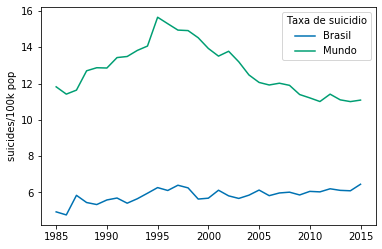

In [26]:
ax = sns.lineplot(x=anos, y=media_suicidios_brasil, label="Brasil")
ax = sns.lineplot(x=anos, y=media_suicidios_mundo, label="Mundo")
plt.legend(title="Taxa de suicidio")

plt.show()

Criando uma tabela dinânica

In [0]:
tabela = pd.pivot_table(df_brasil, values="suicides_no", index=["year"], columns=["age"])

Reordenar tabela pra ficar em ordem crescente

In [0]:
ordem_coluna = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
tabela = tabela.reindex(ordem_coluna, axis=1)

In [19]:
tabela.head(10)

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
year,,,,,,
1985,38.0,470.5,530.0,653.5,341.5,80.5
1986,31.0,508.0,505.5,651.0,372.0,68.0
1987,33.5,502.0,565.5,724.5,422.0,88.5
1988,30.0,472.0,557.5,724.0,356.0,93.5
1989,31.5,491.5,569.0,692.5,354.5,92.5
1990,33.0,517.5,597.5,760.5,398.5,94.5
1991,38.0,537.0,634.0,832.5,441.0,95.5
1992,37.5,549.5,621.5,899.5,404.5,91.0
1993,41.0,625.5,722.0,860.0,405.0,100.5


Plotando o pivot table da tabela

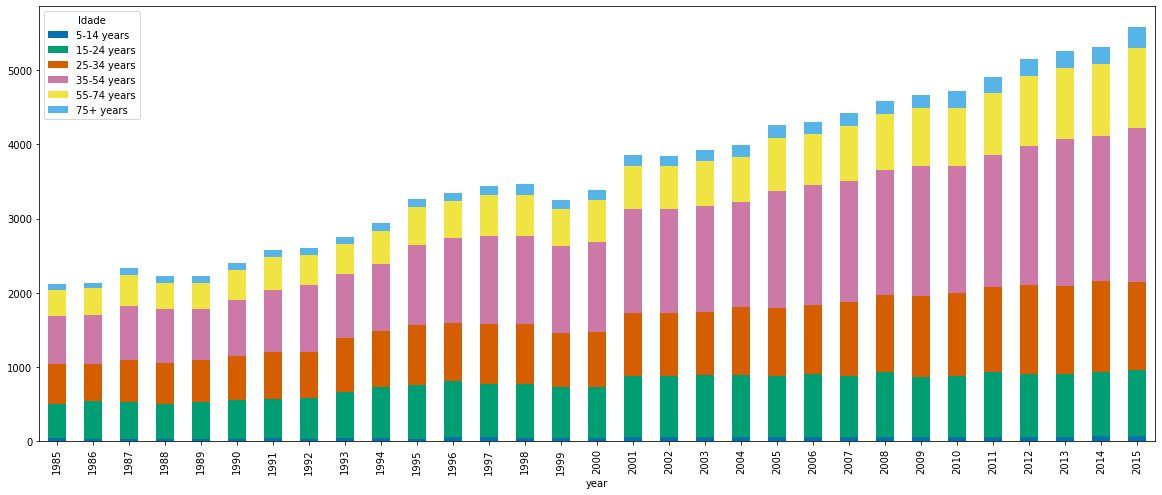

In [20]:
tabela.plot.bar(stacked=True, figsize=(20, 8))
plt.legend(title="Idade")

Estatistica de suicidio por faixa etaria

In [21]:
tabela[["25-34 years"]].loc[2015]
tabela.loc[2015] / tabela.loc[2015].sum()

age
5-14 years     0.012094
15-24 years    0.159993
25-34 years    0.211681
35-54 years    0.371585
55-74 years    0.194571
75+ years      0.050076
Name: 2015, dtype: float64

Taxa de suicidio entre homens e mulheres

In [0]:
 homens_mulheres = df_brasil.groupby('sex').suicides_no.sum() / df_brasil.groupby('sex').suicides_no.sum().sum()

Gráfico de pizza

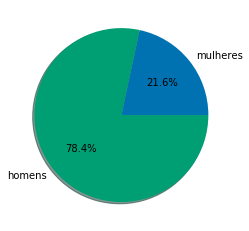

In [23]:
plt.pie(homens_mulheres, labels=['mulheres', 'homens'], autopct='%1.1f%%', shadow=True);

Correlação

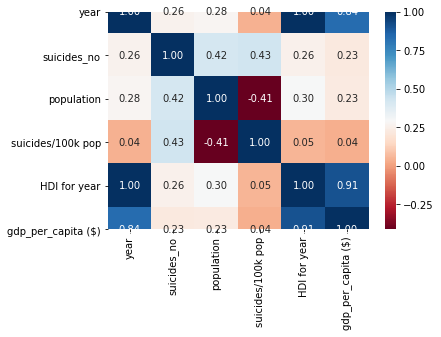

In [24]:
corr = df_brasil.corr()
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);